In [92]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import *
from numpy import *
from matplotlib.font_manager import FontProperties
from matplotlib.lines import Line2D

def get_cmap(n, name='Paired'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)
#     return plt.get_cmap(name)
cmap = get_cmap(12, 'Paired')

# plt.style.use('ggplot')
font = {'family' : 'Times New Roman',
        'size'   : 11}
plt.rc('lines', linewidth=2, markersize=1)
plt.rc('font', **font)
plt.rc('grid', c='0.8', ls='-', lw=0.5)
# plt.rc('axes', axisbelow=True)
plt.rcParams['axes.axisbelow'] = True
params = {'axes.grid': True, 'axes.labelsize': 11,'axes.titlesize': 11, 'font.size': 11, 'legend.fontsize': 11, 'xtick.labelsize': 11, 'ytick.labelsize': 11}

plt.rcParams.update(params)

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)   

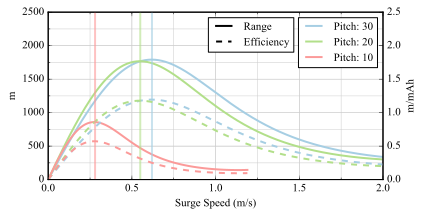

In [139]:
# Range and Efficiency - Steady State Benchmarking
# Looking at Surge Performance Only
# In Pipe Only

list_of_thrust_profiles = [{'Pitch' : 30, 'pDragCoeff': [1.91E+00, 2.91E-01,-3.09E-02], 'pW_TCoeff': [-6.03E+00, 3.92E+01, 2.79E+01],
                            'pI_WCoeff': [ 2.76E-02, -1.50E+00, 3.11E+01, -4.38E+00], 'cCorrection': 100, 'v': arange(0,2.2, .01)}, 
                          {'Pitch' : 20, 'pDragCoeff': [1.91E+00, 2.91E-01,-3.09E-02], 'pW_TCoeff': [-1.20E+01, 6.64E+01, 3.73E+01],
                            'pI_WCoeff': [8.32E-03, -5.61E-01, 1.62E+01, 1.47E+00], 'cCorrection': 100, 'v': arange(0,2, .01)}, 
                          {'Pitch' : 10, 'pDragCoeff': [1.91E+00, 2.91E-01,-3.09E-02], 'pW_TCoeff': [-1.87E+02, 2.92E+02, 4.42E+01],
                            'pI_WCoeff': [4.60E-03, -3.67E-01, 1.33E+01, -3.75E-01], 'cCorrection': 100, 'v': arange(0,1.2, .01)}] 

fig_range_efficiency, ax = plt.subplots(1,1, figsize=(6,3))

ax00 = ax
ax01 = ax.twinx()
ax00.set_ylabel('m')
ax00.set_xlim([0,2])
ax00.set_ylim([0,2500])
minor_x_ticks = arange(0,2, .25)
minor_y_ticks = arange(0,2500, 250)
ax00.set_xticks(minor_x_ticks, minor=True)
ax00.set_yticks(minor_y_ticks, minor=True)
ax00.grid(which='minor')

ax01.set_ylabel('m/mAh')
ax01.set_ylim([0,2.5])
ax01.grid(False)
ax.set_xlabel('Surge Speed (m/s)')
v = arange(0,2.2, .01)

for idx, profile in enumerate(list_of_thrust_profiles):
    pDrag = poly1d(profile['pDragCoeff'])
    v = profile['v']
    D = pDrag(v)
    pWfromT_Hz =  poly1d(profile['pW_TCoeff'])
    Treal_per_T = D/4
    w_ideal = pWfromT_Hz(Treal_per_T)
    c = profile['cCorrection'] # TODO: Fix - For Hz
    D = 0.03
    w_real = sqrt(c * pow(v, 2) / D + pow(w_ideal, 2)) 
    pIfromW_Hz =  poly1d(profile['pI_WCoeff'])
    I_mA =  pIfromW_Hz(w_ideal) * 4 # 4 Thrusters
    Capacity = 1500 #mAh
    v_mperh = v * 3600
    Efficiency = v_mperh/I_mA
    Range = Efficiency * Capacity
    ax00.plot(v, Range, label='Pitch: ' + str(profile['Pitch']), c=cmap(idx*2))
    ax01.plot(v, Efficiency, ls='--', c=cmap(idx*2))
    # Add peak efficiency line
    idx_max_efficiency = argmax(Efficiency)
    ax01.axvline(x=v[idx_max_efficiency], c=cmap(idx*2), alpha=0.6)

custom_lines = [Line2D([0], [0], color='k', lw=2),
                Line2D([0], [0], color='k', ls='--', lw=2)]

leg1 = ax.legend()
leg2 = ax.legend(custom_lines, ['Range', 'Efficiency'], bbox_to_anchor=[.75,1])
ax.add_artist(leg1)

In [140]:
fig_range_efficiency.savefig('Range_Efficiency_30mmD_3Profiles.pdf', edgecolor='0.5', bbox_inches='tight')


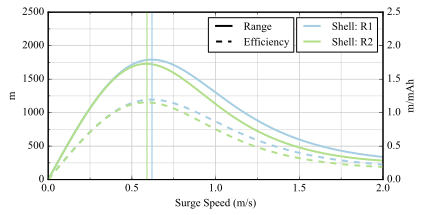

In [141]:
# Range and Efficiency R1 vs R2 - Choose 30Deg Pitch Profile
list_of_thrustr1r2_profiles = [{'Version' : 'R1', 'pDragCoeff': [1.91E+00, 2.91E-01,-3.09E-02], 'pW_TCoeff': [-6.03E+00, 3.92E+01, 2.79E+01],
                            'pI_WCoeff': [ 2.76E-02, -1.50E+00, 3.11E+01, -4.38E+00], 'cCorrection': 100, 'v': arange(0,2.2, .01)},
                              {'Version' : 'R2', 'pDragCoeff': [2.34E+00, 7.20E-02,3.75E-03], 'pW_TCoeff': [-6.03E+00, 3.92E+01, 2.79E+01],
                            'pI_WCoeff': [ 2.76E-02, -1.50E+00, 3.11E+01, -4.38E+00], 'cCorrection': 100, 'v': arange(0,2.2, .01)},] 

fig_range_efficiency_r1vsr2, ax = plt.subplots(1,1, figsize=(6,3))

ax00 = ax
ax01 = ax.twinx()
ax00.set_ylabel('m')
ax00.set_xlim([0,2])
ax00.set_ylim([0,2500])
minor_x_ticks = arange(0,2, .25)
minor_y_ticks = arange(0,2500, 250)
ax00.set_xticks(minor_x_ticks, minor=True)
ax00.set_yticks(minor_y_ticks, minor=True)
ax00.grid(which='minor')

ax01.set_ylabel('m/mAh')
ax01.set_ylim([0,2.5])
ax01.grid(False)
ax.set_xlabel('Surge Speed (m/s)')
v = arange(0,2.2, .01)

for idx, profile in enumerate(list_of_thrustr1r2_profiles):
    pDrag = poly1d(profile['pDragCoeff'])
    v = profile['v']
    D = pDrag(v)
    pWfromT_Hz =  poly1d(profile['pW_TCoeff'])
    Treal_per_T = D/4
    w_ideal = pWfromT_Hz(Treal_per_T)
    c = profile['cCorrection'] # TODO: Fix - For Hz
    D = 0.03
    w_real = sqrt(c * pow(v, 2) / D + pow(w_ideal, 2)) 
    pIfromW_Hz =  poly1d(profile['pI_WCoeff'])
    I_mA =  pIfromW_Hz(w_ideal) * 4 # 4 Thrusters
    Capacity = 1500 #mAh
    v_mperh = v * 3600
    Efficiency = v_mperh/I_mA
    Range = Efficiency * Capacity
    ax00.plot(v, Range, label='Shell: ' + str(profile['Version']), c=cmap(idx*2))
    ax01.plot(v, Efficiency, ls='--', c=cmap(idx*2))
    # Add peak efficiency line
    idx_max_efficiency = argmax(Efficiency)
    ax01.axvline(x=v[idx_max_efficiency], c=cmap(idx*2), alpha=0.6)

custom_lines = [Line2D([0], [0], color='k', lw=2),
                Line2D([0], [0], color='k', ls='--', lw=2)]

leg1 = ax.legend()
leg2 = ax.legend(custom_lines, ['Range', 'Efficiency'], bbox_to_anchor=[.75,1])
ax.add_artist(leg1)

In [142]:
fig_range_efficiency_r1vsr2.savefig('Range_Efficiency_30mmD_ShellR1vsR2.pdf', edgecolor='0.5', bbox_inches='tight')


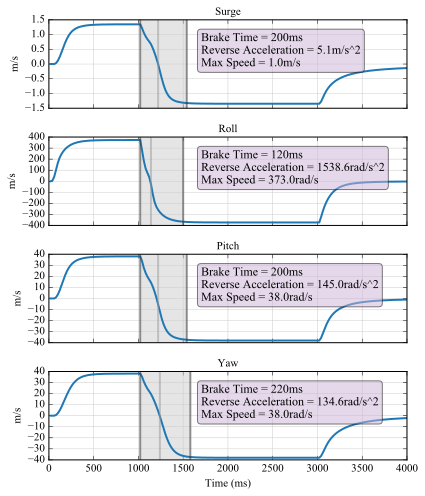

In [275]:
# Look at the vehicle's Full direction step change performance for each DOF

# To measure Agility 4x1 plots for each of the motions. With each one
# Showing pos, vel, acc, and jerk?

Dir_List = ['Surge', 'Roll', 'Pitch', 'Yaw']
vel_tags = ['v.x', 'v.r', 'v.p', 'v.yaw']
error_ls = '--'
data_ts_real.head(1)

figure_agility_r1, axes = plt.subplots(4,1, figsize=(6,7))

ax00 = axes[0] 
props = dict(boxstyle='round', facecolor=cmap(8), alpha=0.5)

# Axes 00 - Tau
for ax in axes:
    ax.set_ylabel('m/s')
    ax.tick_params(axis='x', labelbottom=False)

axes[-1].tick_params(axis='x', labelbottom=True)
axes[-1].set_xlabel('Time (ms)')

for idx, direction in enumerate(Dir_List):
    data_ts_real = pd.read_pickle('Pickles/Agility/' + 'Dynamics_30D_30P_RealJ_TimeSeries_' + direction +'Only_Agility' )
    # Comput max speed, brake speed and velocity inversion acceleration. Plot lines over max speed to min speed and shade in between
    time = data_ts_real.index.values
    v = array(data_ts_real[vel_tags[idx]].values)
    # maxV = v[50:2000].max()[0][0]
    maxvidx = argmax(v)
    vmax = v[maxvidx]
    vmin = .98 * min(v)
    # Find idx with 2% close to min
    zerocrossingidx = where(v<0.02)[0]
    zerocrossingidx = zerocrossingidx[zerocrossingidx > 10][0]
    minvidx = where(v < .98 * min(v))[0][0]

    axes[idx].plot(time,v, c=cmap(1))
    axes[idx].axvline(time[maxvidx], c='.2', alpha=.5)
    axes[idx].axvline(time[minvidx], c='.2', alpha=.5)
    axes[idx].axvline(time[zerocrossingidx], c='.6', alpha=.5)
    axes[idx].axvspan(time[minvidx], time[maxvidx], alpha=0.5, color='.8')
    axes[idx].set_title(direction)
    a_unit = 'rad/s^2'
    v_unit = 'rad/s'
    if direction == 'Surge':
        a_unit = 'm/s^2'
        v_unit = 'm/s'
    s = 'Brake Time = ' + str(time[zerocrossingidx] - time[maxvidx] ) + 'ms' + '\n' + 'Reverse Acceleration = ' + '{0:2.1f}'.format(1000 * (vmax-vmin)/(time[minvidx] - time[maxvidx])) + a_unit + '\n' \
    + 'Max Speed = ' + '{:2.1f}'.format(int(vmax)) + v_unit
    axes[idx].text(0.425, 0.65, s, horizontalalignment='left', verticalalignment='center', transform=axes[idx].transAxes, bbox=props,fontsize=12)
plt.tight_layout()

In [276]:
figure_agility_r1.savefig('Agility_Benchmark_R1.pdf', edgecolor='0.5', bbox_inches='tight')

In [ ]:
# Do the same for R2 to compare but after confirming the torque and rotational drag elemnets